## LOADING DATASET

In [4]:
import pandas as pd

df = pd.read_csv("orders.csv", parse_dates=["order_date"])
df.head()

,order_id,customer_id,order_date,product_category,unit_price,quantity,payment_method,customer_region,is_returned,order_value
0,1,1102,2024-08-31,Sports,15.49,1,COD,West,0,15.49
1,2,1435,2023-09-24,Electronics,234.45,4,Debit Card,South,0,937.80
2,3,1860,2024-11-16,Electronics,74.60,2,Net Banking,South,0,149.20
3,4,1270,2024-01-03,Electronics,335.53,1,Credit Card,West,0,335.53
4,5,1106,2022-11-17,Electronics,114.89,3,Net Banking,North,1,344.67


### Data Quality Check

In [5]:
## (i) Incomplete data
df.isnull().sum()

order_id            0
customer_id         0
order_date          0
product_category    0
unit_price          0
quantity            0
payment_method      0
customer_region     0
is_returned         0
order_value         0
dtype: int64

In [6]:
## (ii) Duplicate data
df.duplicated().sum()

np.int64(0)

In [7]:
## (iii) Inconsistent data/Inaccurate data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          5000 non-null   int64         
 1   customer_id       5000 non-null   int64         
 2   order_date        5000 non-null   datetime64[ns]
 3   product_category  5000 non-null   object        
 4   unit_price        5000 non-null   float64       
 5   quantity          5000 non-null   int64         
 6   payment_method    5000 non-null   object        
 7   customer_region   5000 non-null   object        
 8   is_returned       5000 non-null   int64         
 9   order_value       5000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 390.8+ KB


In [8]:
df.describe()

,order_id,customer_id,order_date,unit_price,quantity,is_returned,order_value
count,5000.000000,5000.000000,5000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,1505.701200,2023-07-07 17:19:23.520000,254.105474,3.033400,0.095800,769.644408
min,1.000000,1000.000000,2022-01-01 00:00:00,10.080000,1.000000,0.000000,10.080000
25%,1250.750000,1253.000000,2022-10-05 00:00:00,128.205000,2.000000,0.000000,291.315000
50%,2500.500000,1510.000000,2023-07-11 00:00:00,250.775000,3.000000,0.000000,608.065000
75%,3750.250000,1761.000000,2024-04-09 00:00:00,381.912500,4.000000,0.000000,1139.467500
max,5000.000000,1999.000000,2024-12-31 00:00:00,499.960000,5.000000,1.000000,2496.950000
std,1443.520003,290.836902,NaN,143.234851,1.403096,0.294346,594.328637


CHECKING INVALID VALUES

In [9]:
A = (df['unit_price'] <= 0).sum()
B = (df['quantity'] <= 0).sum()
print(A)
print(B)

0
0


The dataset has no missing or duplicate records, 

but lacks contextual fields such as return reasons, discounts, and delivery status

## Analysis Questions

## (1)Revenue Trend

How has total revenue changed over time (monthly or yearly)?

Is growth consistent or volatile?

In [10]:
df['order_date'] = pd.to_datetime(df['order_date'])

In [12]:
revenue = df.groupby(df["order_date"].dt.to_period("Y")).agg(
    yearly_revenue=('order_value', 'sum')).reset_index()
revenue

,order_date,yearly_revenue
0,2022,1239297.32
1,2023,1313934.49
2,2024,1294990.23


Total revenue increased from 2022 to 2023 but showed a slight decline in 2024

indicating slowing growth rather than a consistent trend.

### (2)Category Performance

Which product categories generate the most revenue?

Are they also the ones with the highest order volume?

In [13]:
df['Revenue'] = df['quantity'] * df['unit_price']

In [16]:
revenue_growth = df.groupby("product_category")['Revenue'].sum()
revenue_growth.sort_values(ascending=False)

product_category
Beauty         792797.13
Sports         783409.11
Electronics    766095.38
Home           759708.69
Clothing       746211.73
Name: Revenue, dtype: float64

-- 0R --

In [17]:
revenue_growth = df.groupby("product_category")['order_value'].sum()
revenue_growth.sort_values(ascending=False)

product_category
Beauty         792797.13
Sports         783409.11
Electronics    766095.38
Home           759708.69
Clothing       746211.73
Name: order_value, dtype: float64

In [18]:
order_volume = df.groupby("product_category")['order_id'].nunique()
order_volume.sort_values(ascending=False)

product_category
Sports         1045
Beauty         1010
Clothing        989
Electronics     986
Home            970
Name: order_id, dtype: int64

Beauty and Sports generate the highest revenue, while Clothing and Home contribute relatively less. 

Order volume is fairly evenly distributed

indicating revenue differences are driven by order value than demand alone.

### (3)Customer Value Distribution

What does the distribution of order_value look like?

Are there outliers or heavy-tailed behavior?

In [19]:
mean = df["order_value"].mean()
median = df["order_value"].median()

print(mean)
print(median)

769.644408
608.065


Right Skew (Positive Skew): Because the mean is significantly higher than the median, the distribution has a long tail extending toward the higher values on the right side of the curve.

Outliers: This gap typically indicates the presence of high-value outliers that pull the average (mean) upward, while the median remains a more central representation of the typical data point.

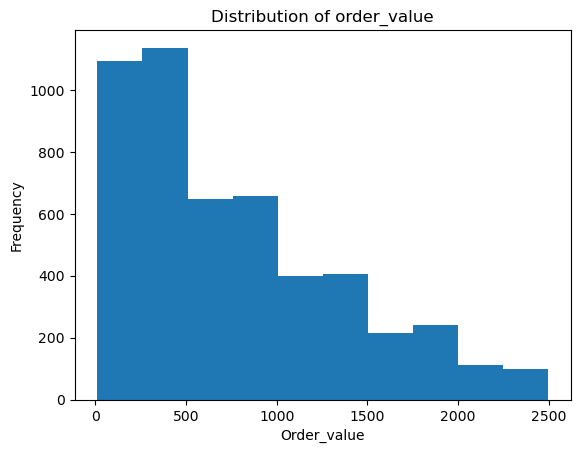

In [23]:
import matplotlib.pyplot as plt

plt.hist(df["order_value"])
plt.xlabel("Order_value")
plt.ylabel("Frequency")
plt.title("Distribution of order_value")
plt.show()

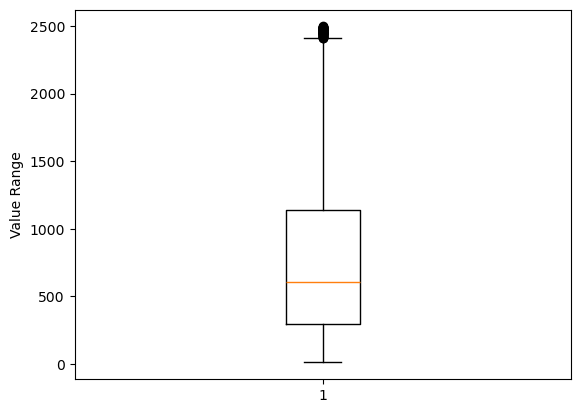

In [24]:
plt.boxplot(df["order_value"])

plt.ylabel("Value Range")
plt.show()

In [25]:
## for skewed 

df['order_value'].quantile([0.95, 0.99])


0.95    1963.846
0.99    2393.704
Name: order_value, dtype: float64

Order value distribution is right-skewed with a small number of high-value orders 

significantly increasing the average compared to the median.

### (4)Top Customers Analysis

What percentage of revenue comes from the top 10% customers?

Is revenue highly concentrated?

In [29]:
customer_revenue = df.groupby('customer_id')['order_value'].sum().reset_index()
total_revenue = df['order_value'].sum()
print(customer_revenue)
print(total_revenue)

     customer_id  order_value
0           1000      6496.15
1           1001      7323.50
2           1002      1606.64
3           1003      2795.16
4           1004      3578.63
..           ...          ...
984         1995      2010.95
985         1996      4941.02
986         1997      4560.35
987         1998      5640.80
988         1999       990.50

[989 rows x 2 columns]
3848222.04


In [30]:
customer_revenue = customer_revenue.sort_values(by='order_value', ascending=False)

In [31]:
top_n = int(len(customer_revenue) * 0.10)
top_10_percent_df = customer_revenue.head(top_n)
top_10_revenue_total = top_10_percent_df['order_value'].sum()

In [32]:
percentage = (top_10_revenue_total / total_revenue) * 100
print(round(percentage,2))

21.09


21% of revenue comes from this top 10% customers. 

These customers represent the most significant contributors to total revenue

### (5)Regional Performance

Which regions perform best and worst in terms of revenue?

Is low performance due to fewer customers or lower order value?

In [33]:
regional_performance = df.groupby("customer_region")["order_value"].sum().reset_index()

In [34]:
perf = regional_performance.sort_values(by="order_value",ascending=False)
perf

,customer_region,order_value
0,East,999891.08
3,West,959760.36
2,South,949377.10
1,North,939193.50


-- OR --

In [35]:
regional_performance = df.groupby("customer_region").agg(
    total_revenue = ("order_value","sum"),
    count_customer = ("customer_id","nunique"),
    average_order_value = ("order_value","mean")).reset_index()

In [36]:
perf = regional_performance.sort_values(by="total_revenue",ascending=False)
perf

,customer_region,total_revenue,count_customer,average_order_value
0,East,999891.08,710,773.310967
3,West,959760.36,696,772.132228
2,South,949377.10,711,763.778842
1,North,939193.50,702,769.200246


Revenue across regions is relatively balanced, with the East performing slightly better.

### (6)Returns Impact

What proportion of orders are returned?

How much revenue is lost due to returns?

(0 = not returned, 1 = returned)

In [37]:
returned = df["is_returned"].value_counts()
print(returned)

is_returned
0    4521
1     479
Name: count, dtype: int64


-- or -- (to get the count of returned orders)

In [38]:
returned = len(df[df["is_returned"]==1])
total_orders = len(df)
print(returned)

proportion = (returned/total_orders)*100
proportion

479


9.58

REVENUE LOST

In [39]:
total_revenue = df["order_value"].sum()
revenue_lost = df[df["is_returned"] == 1]["order_value"].sum()
print(total_revenue)
print(revenue_lost)

3848222.04
372996.2100000001


In [40]:
lost_percent = (revenue_lost/total_revenue)*100
print(lost_percent)

9.692689406248505


The business incurred approximately 373000 in revenue loss due to order returns

### (7)Payment Method Insights

Do different payment methods show different average order values or return rates?

In [41]:
results = df.groupby('payment_method').agg(
    Total_Revenue=('order_value', 'sum'),
    Total_Orders=('order_id', 'count'),
    Total_Returned_Orders=('is_returned', 'sum'))

In [43]:
results['Average_Order_Value'] = results['Total_Revenue'] / results['Total_Orders']

results['Return_Rate_Percent'] = (
    results['Total_Returned_Orders'] / results['Total_Orders']) * 100

results

,Total_Revenue,Total_Orders,Total_Returned_Orders,Average_Order_Value,Return_Rate_Percent
payment_method,,,,,
COD,817576.19,1091,103,749.382392,9.440880
Credit Card,768157.84,988,96,777.487692,9.716599
Debit Card,702361.41,932,85,753.606663,9.120172
Net Banking,794904.75,1007,110,789.379096,10.923535
UPI,765221.85,982,85,779.248320,8.655804


Average order value is similar across payment methods, 

but some methods show slightly higher return rates.

### (8)Seasonality

Are there clear seasonal patterns in orders or revenue?

Which months are strongest and weakest?

In [44]:
df['order_date'] = pd.to_datetime(df['order_date'])

In [46]:
patterns = df.groupby(df["order_date"].dt.to_period("M")).agg(
    monthly_sales=('order_value', 'sum'),
    order_count=('order_id', 'count'))

patterns

,monthly_sales,order_count
order_date,,
2022-01,90385.87,131
2022-02,76892.02,108
2022-03,106639.82,135
2022-04,110625.85,135
2022-05,108593.43,137
2022-06,105368.43,136
2022-07,109469.29,148
2022-08,128019.97,160
2022-09,109081.64,133


Revenue and order volume show clear monthly fluctuations

with certain months consistently outperforming others

indicating seasonal demand patterns.

### (9)Customer Behavior

Do repeat customers behave differently than one-time buyers?

Compare order value or frequency.

In [47]:
customer = df.groupby("customer_id").agg(
    frequency=("customer_id", "count"),
    total_spend=("order_value", "sum"),
    avg_order_value=("order_value", "mean"))

In [49]:
customer['type'] = customer['frequency'].apply(
    lambda x: 'Repeat' if x > 1 else 'One-Time')

# Compare Behavior
comparison = customer.groupby('type').agg(
    avg = ('avg_order_value', 'mean'),
    freq = ('frequency', 'mean'))
print(comparison)

                 avg      freq
type                          
One-Time  657.429231  1.000000
Repeat    770.559045  5.222105


Repeat customers place significantly higher-value orders 

purchase more frequently compared to one-time buyers.